In [15]:
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy import ndimage
import time
import datetime

In [28]:
pixels = 128

In [49]:
if timetagger_pixel_counter.triggered_counter:
    timetagger_pixel_counter.clear_counter()
timetagger_pixel_counter.configure(pixels=pixels)

0

In [50]:
scan_direction = "up"

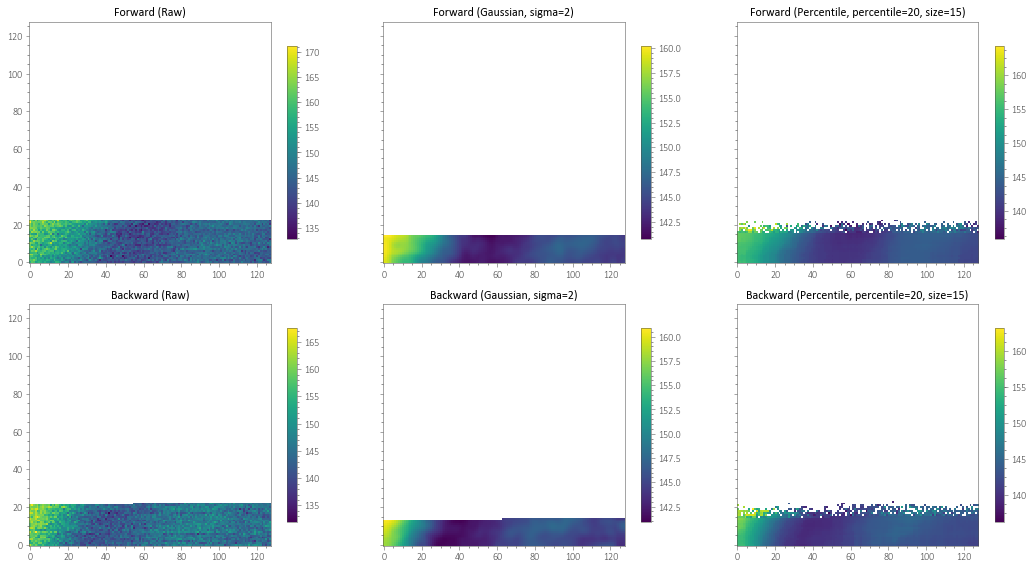

In [52]:
count_rates = timetagger_pixel_counter.get_cleaned_count_rate()
forward, backward = timetagger_pixel_counter.get_forward_backward_counts(count_rates)

norm = 1e3
# Gaussian Filter
sigma = 2

# Percentile Filter
percentile = 20
size = 15

cmap = "viridis"
interpolation = None
shrink = 0.8

forward /= norm
backward /= norm

if scan_direction == "down":
    forward = np.flipud(forward)
    backward = np.flipud(backward)
elif scan_direction == "up":
    pass
else:
    raise ValueError("Scan must be up or down")
    

fig, ((ax, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(ncols=3, nrows=2, sharey="row", figsize=(15, 8))

img_forward = ax.imshow(forward, origin="lower", interpolation=interpolation, cmap=cmap)#,vmin=130 vmax=150)
ax.set_title("Forward (Raw)")
fig.colorbar(img_forward, ax=ax, shrink=shrink)

gaussian_forward = ndimage.filters.gaussian_filter(forward, sigma=sigma)
img_gaussian_forward = ax1.imshow(gaussian_forward, origin="lower", interpolation=interpolation, cmap=cmap)
ax1.set_title(f"Forward (Gaussian, sigma={sigma})")
fig.colorbar(img_gaussian_forward, ax=ax1, shrink=shrink)

percentile_forward = ndimage.filters.percentile_filter(forward, percentile=percentile, size=size)
img_percentile_forward = ax2.imshow(percentile_forward, origin="lower", interpolation=interpolation, cmap=cmap)
ax2.set_title(f"Forward (Percentile, percentile={percentile}, size={size})")
fig.colorbar(img_percentile_forward, ax=ax2, shrink=shrink)


img_backward = ax3.imshow(backward, origin="lower", interpolation=interpolation, cmap=cmap)
ax3.set_title("Backward (Raw)")
fig.colorbar(img_backward, ax=ax3, shrink=shrink)

gaussian_backward = ndimage.filters.gaussian_filter(backward, sigma=sigma)
img_gaussian_backward = ax4.imshow(gaussian_backward, origin="lower", interpolation=interpolation, cmap=cmap)
ax4.set_title(f"Backward (Gaussian, sigma={sigma})")
fig.colorbar(img_gaussian_backward, ax=ax4, shrink=shrink)

percentile_backward = ndimage.filters.percentile_filter(backward, percentile=percentile, size=size)
img_percentile_backward = ax5.imshow(percentile_backward, origin="lower", interpolation=interpolation, cmap=cmap)
ax5.set_title(f"Backward (Percentile, percentile={percentile}, size={size})")
fig.colorbar(img_percentile_backward, ax=ax5, shrink=shrink)

fig.tight_layout()

plt.show()
plt.close()
fig.show()

In [340]:
def save_data(tag=None):
    timestamp = datetime.datetime.now()

    if tag is None:
        tag = ''
        
    filepath = savelogic.get_path_for_module(module_name='PixelScanner')

    if len(tag) > 0:
        filelabel = '{0}_pixelscanner'.format(tag)
    else:
        filelabel = 'pixelscanner'

    # write the parameters:
    parameters = OrderedDict()
    parameters['Num pixels'] = pixels

    data = OrderedDict()
    data['count_rates'] = count_rates

    savelogic.save_data(
        data, 
        filepath=filepath, 
        parameters=parameters, 
        filelabel=filelabel,
        timestamp=timestamp, 
        plotfig=fig, 
        delimiter='\t'
    )
    

In [45]:
save_data(tag="scan27_height_minus800n_excitation_1point8V")